In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from datetime import datetime
import folium
import mysql.connector
import os

In [2]:
start3 = timer()                                               # workflow timer start
datetime3 = datetime.now().strftime('%Y-%m-%d %H:%M:%S')       # timestamp begin

In [3]:
df = pd.read_csv("df.csv", index_col='id')
df = df.dropna()

In [4]:
manhattan = df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Entire home/apt')]

mn_location = 110 * (np.arccos(np.sin(manhattan['latitude']) * np.sin(40.7038)
                               + np.cos(manhattan['latitude']) * np.cos(40.7038)
                               * np.cos(-74.0057 - manhattan['longitude'])))
mn = manhattan.copy()
mn['mn_location'] = mn_location.round(decimals=1)

range2 = mn[(mn['mn_location'] <= 2) & (mn['price'] > 155) & (mn['price'] <= 160)]

In [5]:
#representing the piece of cake that I am going to analyze further, I order it and take the first 10 results
pie = range2[['number_of_reviews', 'last_review', 'latitude', 'longitude', 'host_name']].sort_values(by=['number_of_reviews'], ascending=False).head(10)
print(pie)

          number_of_reviews last_review  latitude  longitude host_name
id                                                                    
2208545                  65  2019-07-05  40.71539  -73.99379     Laura
28916375                 44  2019-07-07  40.71894  -73.99759   Patrick
16514949                 40  2019-07-03  40.71682  -73.99574    Claire
15813993                 39  2019-05-25  40.71520  -73.99947      Sara
413876                   36  2018-09-26  40.70537  -74.00992       Dan
20518456                 32  2019-06-30  40.70744  -74.01521    Sharon
29711772                 27  2019-06-26  40.70410  -74.01550     Susan
32527598                 25  2019-06-21  40.71907  -73.99685   Antonio
21867749                 22  2019-06-19  40.71801  -73.99840     Sheba
24186326                 20  2019-06-23  40.71085  -74.01580     Wyatt


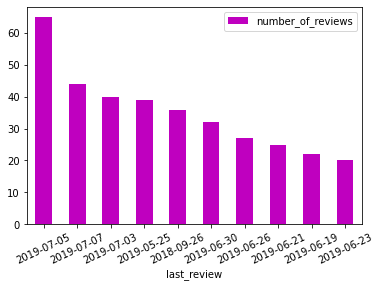

In [6]:
# creating a histogram
pie.plot.bar(x='last_review', y='number_of_reviews', rot=25, color='m') # rotation of dates
plt4 = plt.savefig('plt4.pdf')
plt.show()

In [7]:
# creating map
locations = pie[['latitude', 'longitude']]
lat_list = pie['latitude'].values.tolist()
lon_list = pie['longitude'].values.tolist()
locationlist = locations.values.tolist() # I create a list of lists with lat-lon
len(locationlist) # length list to do the loop
host_name = pie['host_name'].values.tolist() # list with host name
# loading a midpoint to center the map. Zoom based on the DF
ave_lat = pie['latitude'].mean()
ave_lon = pie['longitude'].mean()
m = folium.Map(location=[ave_lat, ave_lon], zoom_start=11.5)
for point in range(0,len(locationlist)):
    folium.Marker(locationlist[point],popup=host_name[point]).add_to(m)
m.save('map.html')

In [8]:
end3 = timer()
end3 = (end3 - start3)

In [9]:
filepath3 = os.path.abspath('Analisi_3')
dfpath = os.path.abspath('df')
img4 = os.path.abspath('plt4')
map = os.path.abspath('map')

In [10]:
mydb = mysql.connector.connect(         # connection to the database created
    host='localhost',
    user='root',
    password='arcelliboccia',
    database='programming')

In [11]:
mycursor = mydb.cursor()
# inserisco i valori nei campi
mycursor.executemany("INSERT INTO exam_py (timestamp, analysis, dataframe, images, time) VALUES (%s, %s, %s, %s, %s)",
                     [
                         (datetime3, filepath3, dfpath, img4, end3),
                         (datetime3, filepath3, dfpath, map, end3)])
mydb.commit()